In [1]:
import pandas as pd
df = pd.read_csv('/content/Salary_Data 23.csv')
print(df.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


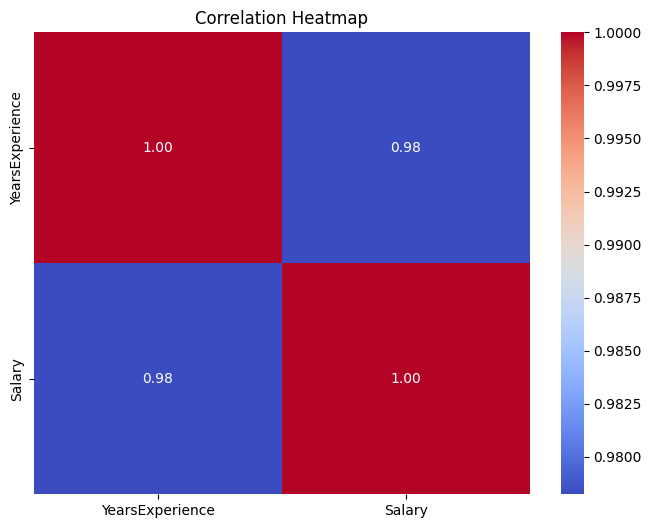

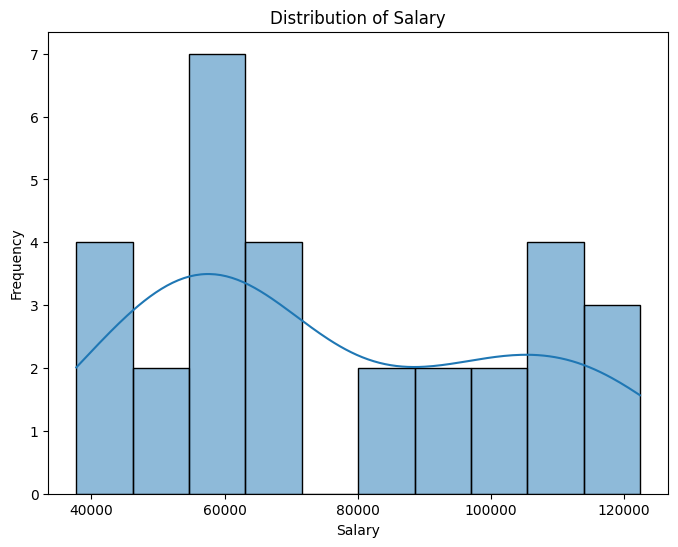

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True, bins=10)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24, 1)
X_test shape: (6, 1)
y_train shape: (24,)
y_test shape: (6,)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

linear_reg_model = LinearRegression()

random_forest_model = RandomForestRegressor(random_state=42)

gradient_boosting_model = GradientBoostingRegressor(random_state=42)

linear_reg_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

estimators = [
    ('lr', linear_reg_model),
    ('rf', random_forest_model),
    ('gb', gradient_boosting_model)
]

voting_reg_model = VotingRegressor(estimators=estimators)

voting_reg_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


In [5]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model_performance = {}

y_pred_lr = linear_reg_model.predict(X_test)
model_performance['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr)
}

y_pred_rf = random_forest_model.predict(X_test)
model_performance['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf)
}

y_pred_gb = gradient_boosting_model.predict(X_test)
model_performance['Gradient Boosting'] = {
    'R2': r2_score(y_test, y_pred_gb),
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'MSE': mean_squared_error(y_test, y_pred_gb)
}

y_pred_vr = voting_reg_model.predict(X_test)
model_performance['Voting Regressor'] = {
    'R2': r2_score(y_test, y_pred_vr),
    'MAE': mean_absolute_error(y_test, y_pred_vr),
    'MSE': mean_squared_error(y_test, y_pred_vr)
}

print("Model Performance:\n")
for model_name, metrics in model_performance.items():
    print(f"  {model_name}:")
    for metric_name, value in metrics.items():
        print(f"    {metric_name}: {value:.2f}")
    print()

best_model_name = max(model_performance, key=lambda k: model_performance[k]['R2'])
print(f"Best performing model based on R-squared: {best_model_name}")

Model Performance:

  Linear Regression:
    R2: 0.90
    MAE: 6286.45
    MSE: 49830096.86

  Random Forest:
    R2: 0.88
    MAE: 6872.01
    MSE: 63721129.71

  Gradient Boosting:
    R2: 0.81
    MAE: 8530.50
    MSE: 99492682.61

  Voting Regressor:
    R2: 0.87
    MAE: 6834.07
    MSE: 66368465.37

Best performing model based on R-squared: Linear Regression


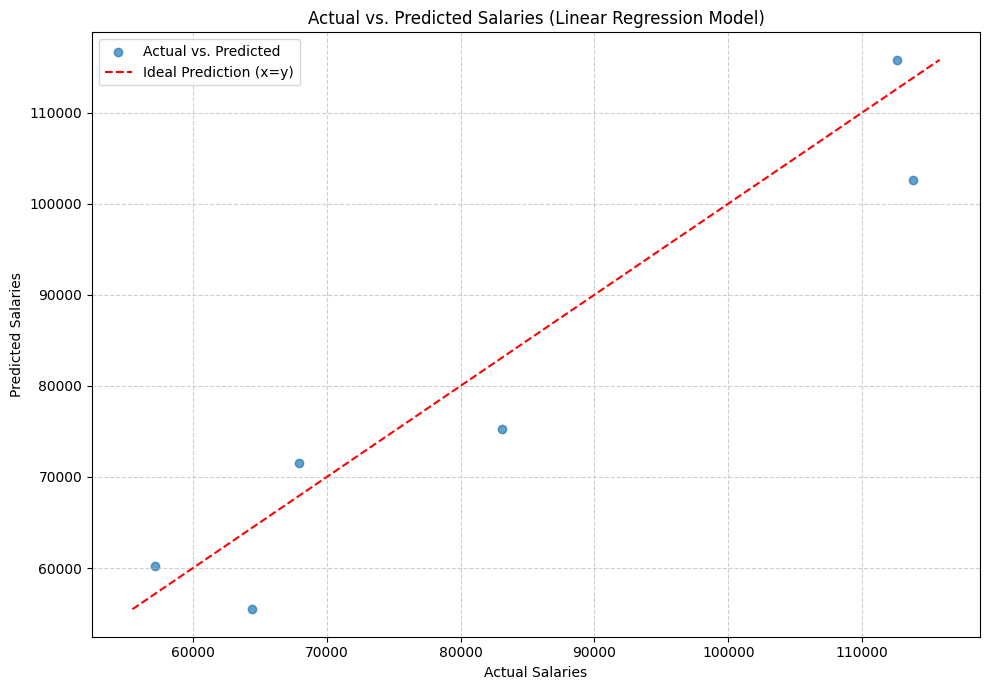

In [6]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_best = linear_reg_model.predict(X_test)

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_best, alpha=0.7, label='Actual vs. Predicted')

min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction (x=y)')

plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs. Predicted Salaries (Linear Regression Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

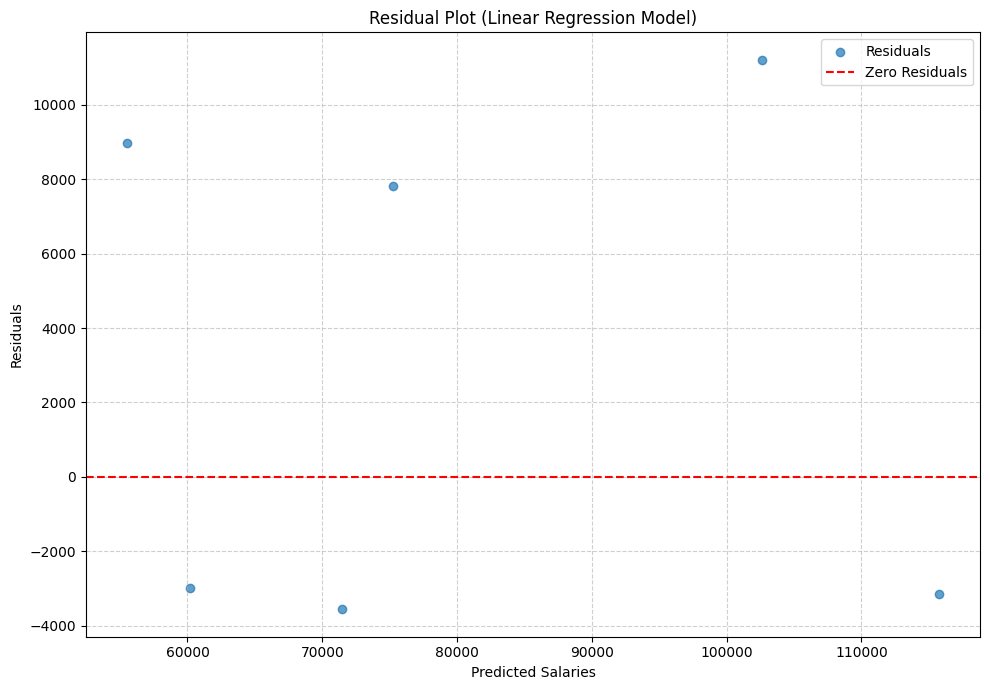

In [7]:
import matplotlib.pyplot as plt
import numpy as np

residuals = y_test - y_pred_best

plt.figure(figsize=(10, 7))
plt.scatter(y_pred_best, residuals, alpha=0.7, label='Residuals')

plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')

plt.xlabel('Predicted Salaries')
plt.ylabel('Residuals')
plt.title(f'Residual Plot ({best_model_name} Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()